# Image Classification with Deep Learning

<img src="https://www.oxagile.com/wp-content/uploads/2020/05/ai-image-recognition-2.png" height=500 width=800>

> Image recognition, a subset of computer vision, refers to the ability of software to identify objects, places, people, writing, and actions in images. It involves the use of machine learning and deep learning models to enable computers to process and interpret the visual world. Here, we'll delve into the concepts that underpin image recognition, offering an overview of how it works, its applications, and the challenges it faces.

## Core Concepts

1. **Feature Extraction:** This is the process of identifying unique attributes or characteristics within an image, such as edges, textures, or color histograms. Early image recognition systems relied heavily on manual feature extraction and engineering. However, with the advent of deep learning, models can now automatically learn these features directly from the data.
2. **Classification:** Once features are extracted, the image recognition system categorizes the image into one or more classes based on its features. This is typically done using machine learning classifiers.
3. **Object Detection:** Beyond classifying an entire image, object detection locates and identifies objects within an image. This involves not just recognizing that an object is present, but also identifying its location and drawing a bounding box around it.
4. **Segmentation:** Image segmentation takes object detection further by dividing an image into segments or pixels that belong to different objects. This is particularly useful in applications where understanding the context and the boundary of objects is crucial, such as in medical imaging or autonomous vehicles.

## Applications

- **Facial Recognition:** Used in security systems, smartphones, and social media for identifying or verifying a person's identity from a digital image or video frame.
- **Autonomous Vehicles:** Enables vehicles to recognize traffic signs, pedestrians, and other vehicles to navigate safely.
- **Healthcare:** From diagnosing diseases from X-rays and MRIs to aiding in surgeries, image recognition plays a crucial role in modern medicine.
- **Agriculture:** Used for crop monitoring, disease detection, and precision farming by analyzing drone or satellite imagery.
- **Retail:** Helps in inventory management, customer experience enhancement, and surveillance by recognizing products, people, and activities.


## Challenges
- **Data Privacy and Ethics:** Especially in applications like facial recognition, concerns around privacy, consent, and ethical use are significant.
- **Bias and Fairness:** Models may inherit or amplify biases present in the training data, leading to unfair or discriminatory outcomes.
- **Complexity of the Visual World:** The infinite variability in lighting, angles, occlusions, and contexts makes image recognition a continually challenging domain.
- **Resource Intensity:** Training state-of-the-art models requires significant computational resources and energy, raising concerns about environmental impact.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:

# Load the CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (for use with categorical_crossentropy)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 [==============================] - 3s 0us/step


![image.png](https://miro.medium.com/v2/resize:fit:1400/1*7_BCJFzekmPXmJQVRdDgwg.png)

Let's use an example image of a dog from the CIFAR-10 dataset, which contains 10 classes of objects including dogs. The image is represented as a matrix of pixel values, with dimensions like width, height, and channels (typically RGB channels).

1. **Convolutional Layers**: The image passes through several convolutional layers. Each convolutional layer applies a set of filters to the input image, capturing different features such as edges, textures, or patterns. For instance, one filter might detect horizontal edges, while another detects diagonal edges.

2. **Max-Pooling Layers**: After each convolutional layer, max-pooling layers are applied. Max-pooling reduces the spatial dimensions of the feature maps obtained from the convolutional layers. This helps in reducing computational complexity and making the model more robust to variations in the input. For example, a max-pooling layer might take the maximum value within a certain region of the feature map, effectively downsampling it.

3. **Fully Connected (Dense) Layers**: Following the convolutional and max-pooling layers, the feature maps are flattened and fed into fully connected dense layers. These layers aggregate the features learned by the convolutional layers and perform classification based on these features. Each neuron in the dense layers is connected to every neuron in the previous layer, allowing for complex feature combinations.

4. **ReLU Activation**: Rectified Linear Unit (ReLU) activation function is applied after each convolutional and dense layer, introducing non-linearity to the model. ReLU sets all negative values to zero and keeps positive values unchanged. This helps the model to learn complex patterns and make the learning process more efficient.

5. **Softmax Activation**: In the output layer, softmax activation is applied. Softmax converts the raw output of the network into probabilities for each class. For example, if the network predicts probabilities of `[0.1, 0.8, 0.05, 0.05, 0, 0, 0, 0, 0, 0]`, it means it assigns a high probability (0.8) to the class "dog" (assuming "dog" is the second class in CIFAR-10), indicating that the image is most likely a dog.

6. **Optimizer**: The model is trained using the Adam optimizer, which dynamically adjusts the learning rate during training based on the gradients of the parameters. This helps in faster convergence and better performance compared to traditional gradient descent algorithms.

7. **Loss Function**: The model is trained using categorical cross-entropy loss function. This loss function measures the dissimilarity between the predicted class probabilities and the actual class labels. It's well-suited for multi-class classification tasks like CIFAR-10.

8. **Metrics**: During training, accuracy is chosen as the evaluation metric to monitor the model's performance. Accuracy measures the proportion of correctly classified images out of the total number of images. For example, an accuracy of 0.85 means that 85% of the images are correctly classified.

In [ ]:
model = models.Sequential([
    # Convolutional base
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=2,
                    validation_data=(x_test, y_test))


Epoch 1/2
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1574 - accuracy: 0.5905 - val_loss: 1.0892 - val_accuracy: 0.6101
Epoch 2/2
1563/1563 [==============================] - 76s 48ms/step - loss: 0.9986 - accuracy: 0.6497 - val_loss: 0.9644 - val_accuracy: 0.6657


313/313 - 4s - loss: 0.9644 - accuracy: 0.6657 - 4s/epoch - 14ms/step
0.6657000184059143


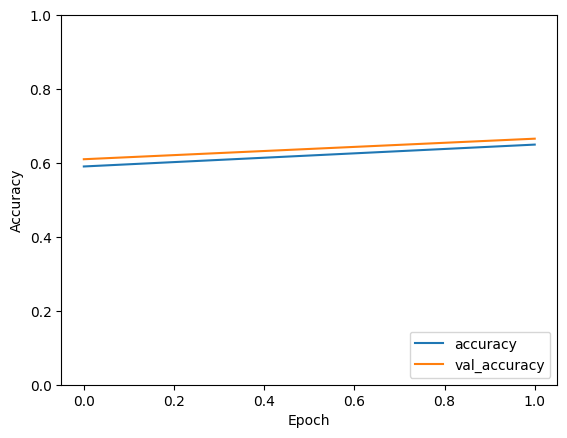

In [ ]:
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0, 1])
# plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
# print(test_acc)

In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 7s 19ms/step


In [ ]:
predicted_classes = np.argmax(predictions, axis=1)

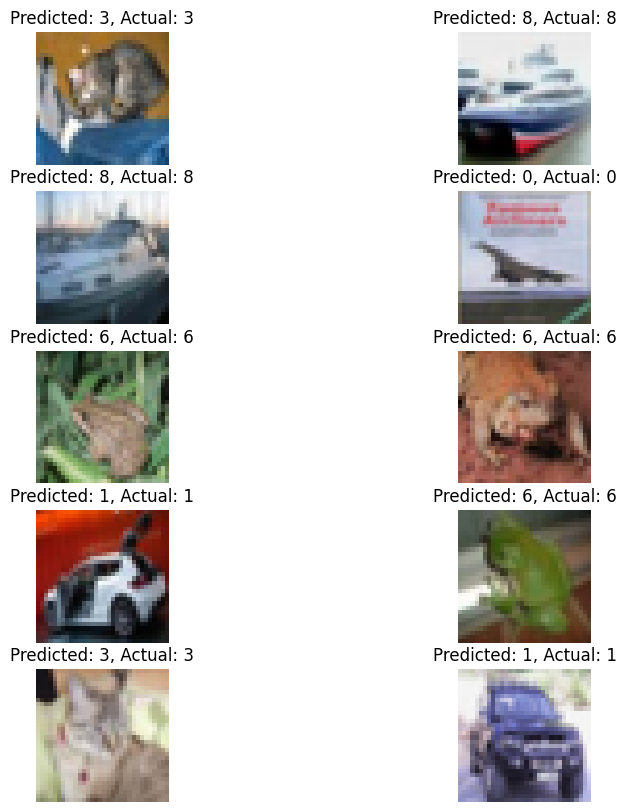

In [ ]:
# plt.figure(figsize=(10, 10))
# for i in range(10):  # Display predictions for the first 10 samples
#     plt.subplot(5, 2, i + 1)
#     plt.imshow(x_test[i])
#     plt.title(f"Predicted: {predicted_classes[i]}, Actual: {np.argmax(y_test[i])}")
#     plt.axis('off')
# plt.show()